### Explore ACLED data

A notebook for sharing exploration code for the ACLED data

In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import sys
import os 
import io
module_path = os.path.abspath(os.path.join('../src'))
os.chdir(module_path)
sys.path.insert(0, module_path)
from data.utils import *

In [18]:
kenya_counties = load_data(bucket=BUCKET, path = "BOUNDARIES/ADMIN_1/Africa_bnd_adm1.shp").query("adm0_name == 'Kenya'")
kenya_counties.head()

,OBJECTID,iso3,adm1_name,adm1_altnm,adm1_id,adm0_name,adm0_id,mapclr,rb,disp_area,salb_id,source,source_id,source_dat,lst_update,validity,shape_Leng,shape_Area,ucode,geometry
382,2493,KEN,Baringo,NaN,903882,Kenya,133,KEN,RBN,no,NaN,OCHA (ROSEA),KE030,2018-07-03,2023-01-16,0,5.932315,0.884732,KEN_0001_V1,"POLYGON ((35.78390 1.65557, 35.78496 1.65554, ..."
383,2494,KEN,Bomet,NaN,903883,Kenya,133,KEN,RBN,no,NaN,OCHA (ROSEA),KE036,2018-07-03,2023-01-16,0,2.922220,0.198099,KEN_0002_V1,"POLYGON ((35.47360 -0.39920, 35.47845 -0.40663..."
384,2495,KEN,Bungoma,NaN,903884,Kenya,133,KEN,RBN,no,NaN,OCHA (ROSEA),KE039,2018-07-03,2023-01-16,0,3.058455,0.244211,KEN_0003_V1,"POLYGON ((34.62385 1.09989, 34.62463 1.09907, ..."
385,2496,KEN,Busia,NaN,903885,Kenya,133,KEN,RBN,no,NaN,OCHA (ROSEA),KE040,2018-07-03,2023-01-16,0,2.641988,0.145977,KEN_0004_V1,"POLYGON ((34.36734 0.77358, 34.36814 0.77290, ..."
386,2497,KEN,Elgeyo-Marakwet,NaN,903886,Kenya,133,KEN,RBN,no,NaN,OCHA (ROSEA),KE028,2018-07-03,2023-01-16,0,3.888933,0.244432,KEN_0005_V1,"POLYGON ((35.69818 1.28225, 35.69788 1.27905, ..."


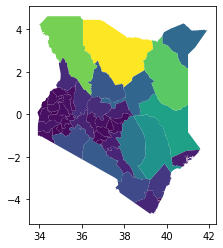

In [19]:
kenya_counties.plot(column = "shape_Area")

In [20]:
df = load_data(BUCKET, "CONFLICT/ACLED_data_Africa_Ucodes.csv").reset_index()
df.head()

,OID_,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,...,source,source_scale,notes,fatalities,tags,timestamp,ucode_level0,ucode_level1,ucode_level2,ucode
0,1,BFO11038,17 November 2023,2023,1,Political violence,Violence against civilians,Attack,JNIM: Group for Support of Islam and Muslims,NaN,...,BurkinaWeb; Facebook,New media-National,"On 17 November 2023, JNIM militants killed fiv...",5,NaN,1700524094,BFA_V1,BFA_0001_V1,BFA_0001_0003_V1,BFA_V1
1,2,BFO11043,17 November 2023,2023,1,Strategic developments,Strategic developments,Looting/property destruction,JNIM: Group for Support of Islam and Muslims,NaN,...,Undisclosed Source,Local partner-Other,"Looting: On 17 November 2023, JNIM militants s...",0,NaN,1700524094,BFA_V1,BFA_0008_V1,BFA_0008_0005_V1,BFA_V1
2,3,MLI31293,17 November 2023,2023,1,Political violence,Explosions/Remote violence,Air/drone strike,Military Forces of Niger (2023-),NaN,...,Twitter; Undisclosed Source,Local partner-Other,"On 17 November 2023, likely Nigerien forces ca...",3,NaN,1700524094,MLI_V1,MLI_0002_V1,MLI_0002_0004_V1,MLI_V1
3,4,MLI31299,17 November 2023,2023,1,Political violence,Battles,Armed clash,JNIM: Group for Support of Islam and Muslims,NaN,...,Undisclosed Source,Local partner-Other,"On 17 November 2023, JNIM militants attacked a...",3,NaN,1700524094,MLI_V1,MLI_0007_V1,MLI_0007_0003_V1,MLI_V1
4,5,MLI31314,17 November 2023,2023,1,Political violence,Violence against civilians,Attack,Military Forces of Mali (2021-),Wagner Group,...,Twitter,New media,"On 17 November 2023, Wagner mercenaries arrest...",0,NaN,1700524094,MLI_V1,MLI_0004_V1,MLI_0004_0002_V1,MLI_V1
